# Dataset example (LFCC)

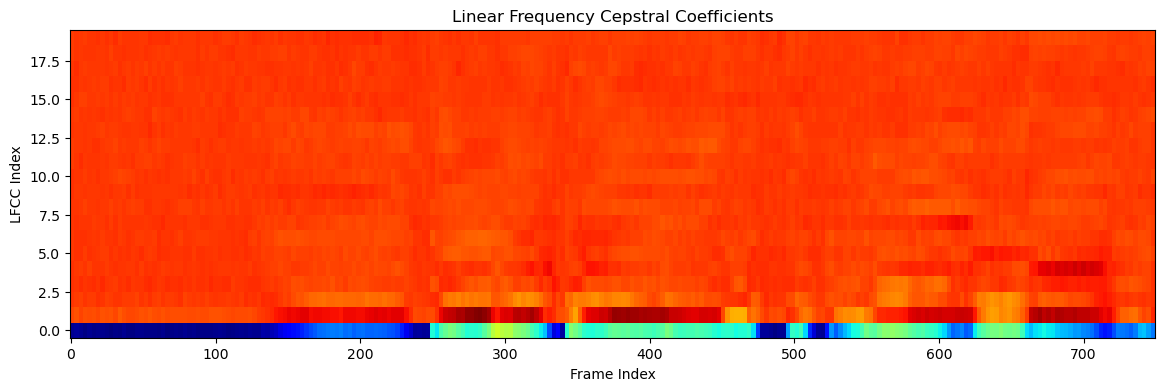

In [1]:
from datasets.dataset import LADataset, collate_fn
from torch.utils.data import DataLoader
from spafe.utils.vis import show_features

# Configure txtpath and data directory
txtpath = "datasets/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
datadir = "datasets/LA/ASVspoof2019_LA_train/"

# Training dataset
train_dataset = LADataset(split="train", transforms="lfcc",
                          n_fft=512, num_features=20, txtpath=txtpath, datadir=datadir)
# visualize features
show_features(train_dataset[0][0].numpy(), "Linear Frequency Cepstral Coefficients", "LFCC Index", "Frame Index")

# Simple framework Training

In [2]:
from models.resnet import ResNet
import torch
import torch.nn as nn
import os
import torch.nn.functional as F
from tqdm import tqdm
from torchsummary import summary

# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device is : {device}")

Current device is : cuda


## Trainer function

In [3]:
from utils.train import trainer

## Training config

In [4]:
model = ResNet(3, 256, '18', nclasses=2).to(device)
summary(model, (1, 750, 20), batch_size=64)

# Configure txtpath and data directory
train_txtpath = "datasets/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
train_datadir = "datasets/LA/ASVspoof2019_LA_train/"

# Configure txtpath and data directory
val_txtpath = "datasets/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"
val_datadir = "datasets/LA/ASVspoof2019_LA_dev/"

train_dataset = LADataset(split="train", transforms="lfcc", n_fft=512, num_features=20, txtpath=train_txtpath, datadir=train_datadir)
val_dataset = LADataset(split="dev", transforms="lfcc", n_fft=512, num_features=20, txtpath=val_txtpath, datadir=val_datadir)

learning_rate = 0.0003
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-8, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, gamma=0.5, step_size=10)
epochs = 10
batch_size = 64

In [5]:
trainer(model, train_dataset, val_dataset, learning_rate, criterion, optimizer, scheduler, epochs, batch_size, exp_name="baseline", device=device)

0it [00:00, ?it/s]

Training ... [Epoch 1/10]


Loss : 0.4709, Acc : 81.5430%                     (Real : 12.5000%, Fake : 87.0860%): : 16it [00:23,  1.46s/it]


KeyboardInterrupt: 